<h1>Buisness Understanding</h1>

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df_public = pd.read_csv('./stack-overflow-survey-2020/survey_results_public.csv')
df_schema = pd.read_csv('./stack-overflow-survey-2020/survey_results_schema.csv')

In [40]:
df_public.shape

(64461, 61)

In [41]:
df_public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [269]:
list(df_schema[df_schema.Column == 'NEWJobHunt'].QuestionText)[0]

'In general, what drives you to look for a new job? Select all that apply.'

In [272]:
jobfactor = df_public['NEWJobHunt'].value_counts()
jobfactor

Curious about other opportunities;Better compensation;Wanting to work with new technologies;Growth or leadership opportunities                                                                                                                             1127
Curious about other opportunities;Better compensation;Better work/life balance;Wanting to work with new technologies;Growth or leadership opportunities                                                                                                    1121
Better compensation                                                                                                                                                                                                                                         803
Curious about other opportunities;Better compensation;Wanting to work with new technologies                                                                                                                                             

TypeError: 'value' must be an instance of str or bytes, not a float

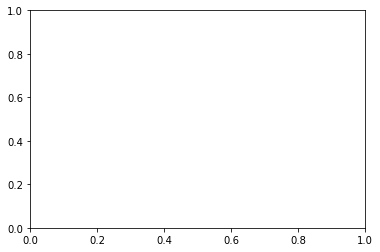

In [256]:
plt.hist

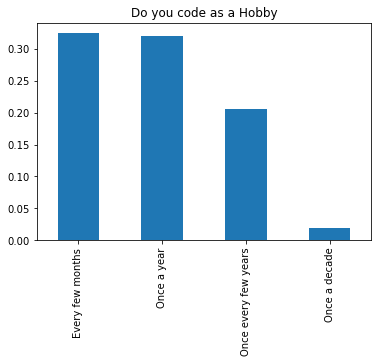

In [226]:
(jobfactor/df_public.shape[0]).plot(kind="bar")
plt.title("Do you code as a Hobby");

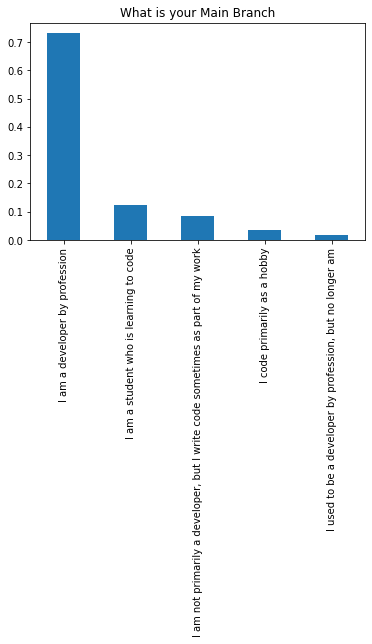

In [270]:
mainbranch = df_public['MainBranch'].value_counts()
(mainbranch/df_public.shape[0]).plot(kind="bar")
plt.title("What is your Main Branch");

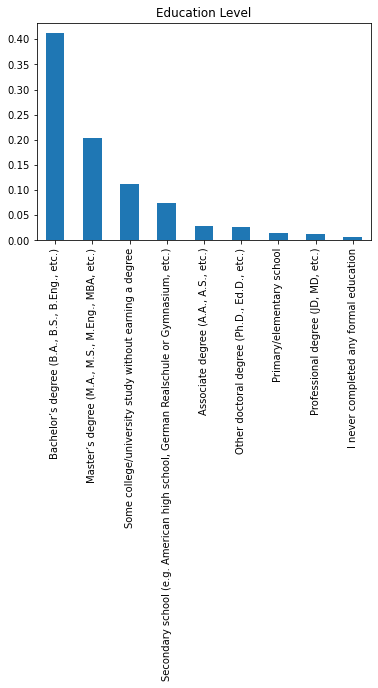

In [271]:
edlevel = df_public['EdLevel'].value_counts()
(edlevel/df_public.shape[0]).plot(kind="bar")
plt.title("Education Level");

In [272]:
df_public['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

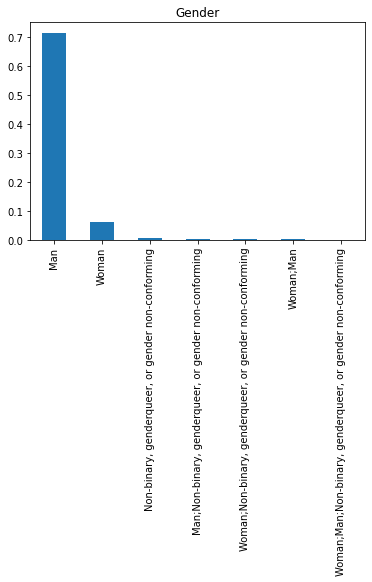

In [273]:
gender = df_public['Gender'].value_counts()
(gender/df_public.shape[0]).plot(kind="bar")
plt.title("Gender");

In [236]:
pd.DataFrame(df_public.query("JobSeek == 'I’m not actively looking, but I am open to new opportunities'").groupby(['Employment', 'JobSat']).mean()['WorkWeekHrs'])

WorkWeekHrs
Employment                                         JobSat                                         
Employed full-time                                 Neither satisfied nor dissatisfied    40.603161
                                                   Slightly dissatisfied                 41.448904
                                                   Slightly satisfied                    41.180400
                                                   Very dissatisfied                     41.605512
                                                   Very satisfied                        41.016847
Employed part-time                                 Neither satisfied nor dissatisfied    29.266949
                                                   Slightly dissatisfied                 30.151389
                                                   Slightly satisfied                    28.888194
                                                   Very dissatisfied                     24.291667
                                                   Very satisfied                        28.680240
Independent contractor, freelancer, or self-emp... Neither satisfied nor dissatisfied    40.761755
                                                   Slightly dissatisfied                 39.007987
                                                   Slightly satisfied                    39.644429
                                                   Very dissatisfied                     39.030864
                                                   Very satisfied                        41.273232

***Below are some interesting graps ha ha ha ha***

<AxesSubplot:>

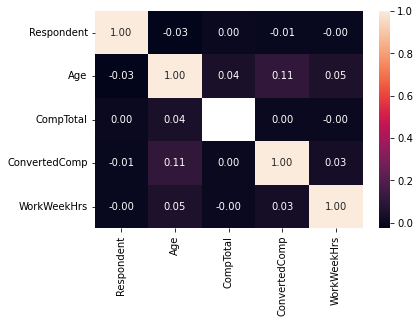

In [275]:
sns.heatmap(df_public.corr(),annot=True,fmt=".2f")

**In line below we dropped all rows in which ConvertedComp column contains null value**

In [242]:
df_public_comp = df_public.dropna(subset = ['ConvertedComp'])

**Dropped the respondent column because it did not contain useful information.**

In [243]:
df_public_comp = df_public_comp.drop(['Respondent','CompTotal'],axis=1)

<AxesSubplot:>

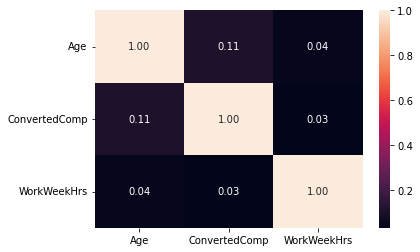

In [244]:
sns.heatmap(df_public_comp.corr(),annot=True,fmt=".2f")

**In code below, i dropped columns whose rows contain only null values**

In [245]:
df_public_comp = df_public_comp.dropna(how = 'all',axis=1)

**Assigned y the variable we are trying to predict-in this case it is ConvertedComp**

In [246]:
y = df_public_comp['ConvertedComp']

In [247]:
df_public_comp.YearsCode = df_public_comp.YearsCode.replace(to_replace="Less than 1 year",value = '1')
df_public_comp.YearsCode = df_public_comp.YearsCode.replace(to_replace="More than 50 years",value = '50')
df_public_comp.YearsCode = pd.to_numeric(df_public_comp.YearsCode)

In [248]:
df_public_comp.YearsCodePro = df_public_comp.YearsCodePro.replace(to_replace="Less than 1 year",value = '1')
df_public_comp.YearsCodePro = df_public_comp.YearsCodePro.replace(to_replace="More than 50 years",value = '50')
df_public_comp.YearsCodePro = pd.to_numeric(df_public_comp.YearsCodePro)

In [249]:
df_public_comp.Age1stCode = df_public_comp.Age1stCode.replace(to_replace="Younger than 5 years",value = '5')
df_public_comp.Age1stCode = df_public_comp.Age1stCode.replace(to_replace="Older than 85",value = '85')
df_public_comp.Age1stCode = pd.to_numeric(df_public_comp.Age1stCode)

In [250]:
pd.DataFrame(df_public_comp.query("JobSeek == 'I’m not actively looking, but I am open to new opportunities'").groupby(['Employment', 'JobSat']).mean()['YearsCode'])

YearsCode
Employment                                         JobSat                                       
Employed full-time                                 Neither satisfied nor dissatisfied  13.280325
                                                   Slightly dissatisfied               14.215015
                                                   Slightly satisfied                  13.630678
                                                   Very dissatisfied                   14.307853
                                                   Very satisfied                      14.461611
Employed part-time                                 Neither satisfied nor dissatisfied   9.126316
                                                   Slightly dissatisfied               10.310924
                                                   Slightly satisfied                  10.898734
                                                   Very dissatisfied                    9.906250
                                                   Very satisfied                      10.984496
Independent contractor, freelancer, or self-emp... Neither satisfied nor dissatisfied  16.285714
                                                   Slightly dissatisfied               17.741573
                                                   Slightly satisfied                  17.734513
                                                   Very dissatisfied                   19.091603
                                                   Very satisfied                      19.876122

**Dropped column used in 'y' and assigned rest of the columns to X-columns which are factors which can affect the prediction**

In [188]:
X = df_public_comp.drop(['ConvertedComp'],axis = 1)

In [189]:
print(X.shape)
X_cols_size = X.select_dtypes(include=['object']).copy().columns
X_cols_dropped = []
for col in X_cols_size:
    if(len(list(X[col].value_counts().keys())) > 15):
        X_cols_dropped.append((col,len(list(X[col].value_counts().keys())),X[col].dtype))
        X = X.drop([col],axis=1)
X.shape       

(34756, 58)


(34756, 35)

In [190]:
add_cols = ['JobFactors','']

[('Country', 159, dtype('O')),
 ('CurrencyDesc', 128, dtype('O')),
 ('CurrencySymbol', 128, dtype('O')),
 ('DatabaseDesireNextYear', 2437, dtype('O')),
 ('DatabaseWorkedWith', 2334, dtype('O')),
 ('DevType', 6155, dtype('O')),
 ('Ethnicity', 147, dtype('O')),
 ('JobFactors', 227, dtype('O')),
 ('LanguageDesireNextYear', 10531, dtype('O')),
 ('LanguageWorkedWith', 9370, dtype('O')),
 ('MiscTechDesireNextYear', 3660, dtype('O')),
 ('MiscTechWorkedWith', 1935, dtype('O')),
 ('NEWCollabToolsDesireNextYear', 1052, dtype('O')),
 ('NEWCollabToolsWorkedWith', 999, dtype('O')),
 ('NEWJobHunt', 2029, dtype('O')),
 ('NEWJobHuntResearch', 63, dtype('O')),
 ('NEWPurchaseResearch', 62, dtype('O')),
 ('NEWSOSites', 49, dtype('O')),
 ('NEWStuck', 402, dtype('O')),
 ('PlatformDesireNextYear', 5265, dtype('O')),
 ('PlatformWorkedWith', 4717, dtype('O')),
 ('WebframeDesireNextYear', 2664, dtype('O')),
 ('WebframeWorkedWith', 2932, dtype('O'))]

**Filled null values in columns with 'float' or 'int' as their variable type**

In [191]:
X_cols = X.select_dtypes(include = ['float','int']).columns
X_cols
for col in X_cols:
    X[col].fillna(X[col].mean(),inplace = True)

In [294]:
#X_cols_num = X.columns
#counts = []
#for col in X_cols_num:
#    counts.append((col,X[col].value))
#a= X.MainBranch.unique()

**In below lines, i have created dummy columns for columns with multiple values, this helps to use these variables for prediction. And also dropped the original variables**

*After running the below code i realized i have to consider how many dummy columns i should consider from one column. The number of dummy columns have increased too much, introducing complexity, redundant columns, and many useless columns.*

In [196]:
X_cols_2 = X.select_dtypes(include = ['object']).copy().columns
for col in X_cols_2[:10]:
    try:
        X = pd.concat([X.drop(col,axis = 1), pd.get_dummies(X[col],prefix=col,prefix_sep='_',drop_first=True)],axis=1)
    except:
        continue

**Dividing data into train test split**

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=42)

In [177]:
X_train.shape , y_train.shape , X_test.shape, y_test.shape

((20853, 96), (20853,), (13903, 96), (13903,))

In [182]:
lm_model = LinearRegression(normalize=True)

In [199]:
lm_model.fit(X_train,y_train)
y_predict = lm_model.predict(X_test)
r2_score(y_test,y_predict)

0.14947742662503605

In [200]:
y_train_preds = lm_model.predict(X_train)
r2_score(y_train,y_train_preds)

0.20031226450766115